# import

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# ตัวอย่างง่ายๆ

- matplotlib จะวาดกราฟของข้อมูลของเราในรูปแบบของ Figure
- แต่ละ Figure จะประกอบด้วย Axes ซึ่งจะบรรจุข้อมูลของเราใน x-y coordinates
- การเรียกใช้ pyplot.subplots() จะคืนค่า Figure และ Axes ออกมา
- จากนั้นเราจะสามารถใช้ Axes.plot เพื่อวาดข้อมูลลงบน Axes ได้:

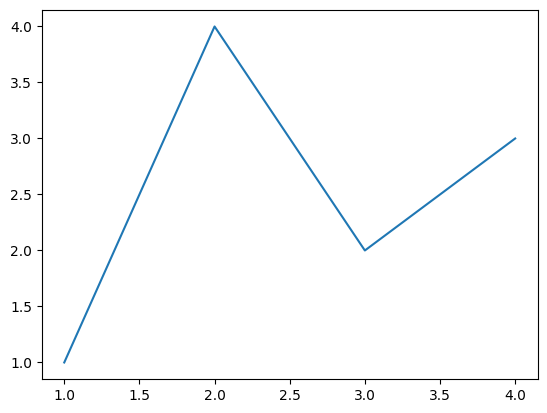

In [3]:
fig, ax = plt.subplots() # สร้าง Figure กับ Axes โดยเรียก plt.subplots()
ax.plot([1,2,3,4], [1,4,2,3]) # พล็อตข้อมูลไปบน Axes

- ในไฟล์ .ipynb, Figure จะถูกโชว์ทันทีที่เรียก ax.plot()
- แต่ถ้าเราเขียนบนไฟล์ .py Figure จะไม่ปรากฎขึ้นมา จนกว่าจะเรียก plt.show() เพื่อแสดง Figure ขึ้นมา

# ส่วนต่าง ๆ ของ Figure

![Alt text](../anatomy.jpg)

image from https://matplotlib.org/stable/tutorials/introductory/quick_start.html#sphx-glr-tutorials-introductory-quick-start-py

ด้านบนนี้คือองค์ประกอบของ matplotlib Figure

## Figure

- Figure ก็คือทั้งรูปเลย 
- Figure จะมี Axes ทั้งหลาย และ Artists ทั้งหลาย (เช่น title, figure legends, แท่งสี ฯลฯ) อยู่ในความดูแล

เรามาดูวิธีการสร้าง Figure แบบต่าง ๆ ใน matplotlib กันเถอะ

<Figure size 640x480 with 0 Axes>

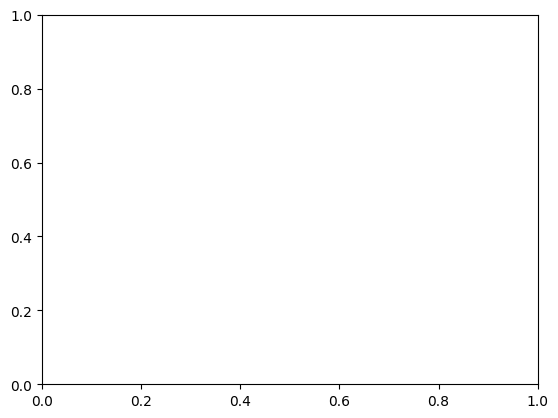

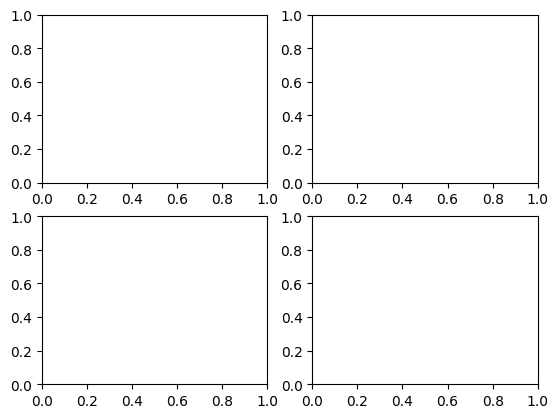

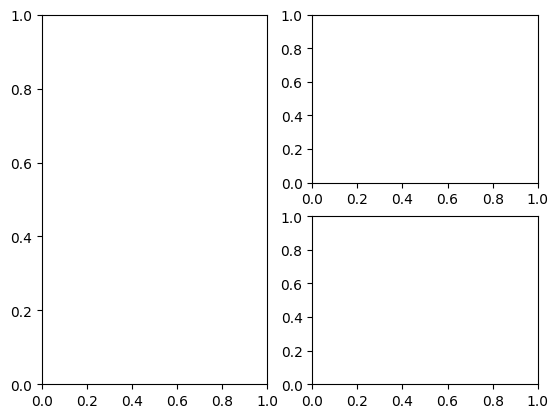

In [5]:
fig = plt.figure()              # Figure เปล่า ๆ ไม่มี Axes
fig, ax = plt.subplots()        # Figure ที่มี Axes ในการดูแล 1 หน่อ
fig, axs = plt.subplots(2,2)    # Figure ที่มี Axes 4 อัน (#row, #column)

# Figure ที่มี Axes อยู่ซ้ายอันนึง ขวาสองอัน
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right-bottom']])

- เราสามารถสร้าง Axes มาพร้อมกับ Figure เลยได้
- หรือจะสร้าง Figure แล้วค่อยใส่ Axes ทีหลังก็ได้

## Axes

- แต่ละ Axes จะมี Axis object ของตัวเอง (เช่น 2 มิติ ก็จะมี 2 Axis objects) 
- แต่ละ Axes จะมี title ของตัวเอง (ใช้ set_title() ในการ set)
- แต่ละ Axes จะมี x-label ของตัวเอง (ใช้ set_xlabel() ในการ set)
- แต่ละ Axes จะมี y-label ของตัวเอง (ใช้ set_ylabel() ในการ set)
- Axes เป็นสิ่งที่เราจะใช้พล็อตข้อมูลลงไป ผ่าน methods ที่ใช้พล็อตได้จำนวนมาก เช่น ax.plot()

## Axis

- เป็นคน set scale และ limits ของแกน

## Artist

- จริง ๆ แล้วทุกอย่างที่ปรากฎบน Figure ถูกเรียกว่า Artist
- Artist ส่วนใหญ่จะถูกผูกติดกับ Axes (แต่ละ Axes ไม่ได้ใช้ Artist ร่วมกัน)

# ชนิดของ inputs ของฟังก์ชันสำหรับพล็อต

- ปกติแล้วควรแปลงเป็น numpy.array, numpy.asarray หรือ numpy.ma.masked_array ก่อนจะพล็อต
- ใช้ classes อื่นที่เป็น array-like ก็ได้นะ แต่ถ้าผลลัพธ์ไม่เป็นไปตามที่คิด ก็ให้แปลงเป็น numpy.array ก่อนเน่อ

- ถ้าใช้ addressable object เช่น dictionary, numpy.recarray หรือ pandas.DataFrame จะแยกชุดข้อมูลออกเป็นสีต่าง ๆ กันให้เลย

Text(0, 0.5, 'entry b')

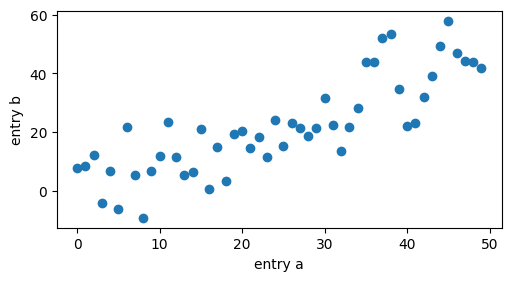

In [15]:
np.random.seed(1)  # set the random number generator
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# scatter plot ธรรมดาที่ใช้ข้อมูลจาก data ตัวที่ 'a' และ 'b'
ax.scatter(data['a'], data['b'])  

ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

ax.scatter(data['a'], data['b']) 

มีค่าเท่ากับ

ax.scatter('a', 'b', data = data) 

Text(0, 0.5, 'entry b')

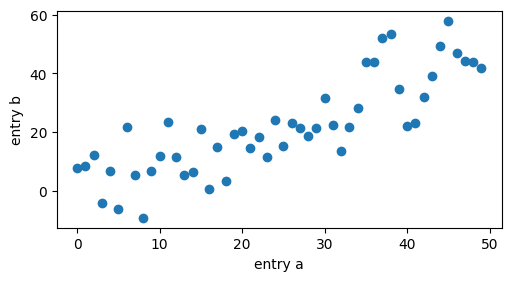

In [14]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# scatter plot ธรรมดาที่ใช้ข้อมูลจาก data ตัวที่ 'a' และ 'b'
ax.scatter('a', 'b', data = data)  

ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

เพิ่มการระบุสีด้วย c และการระบุขนาดจุดด้วย s

Text(0, 0.5, 'entry b')

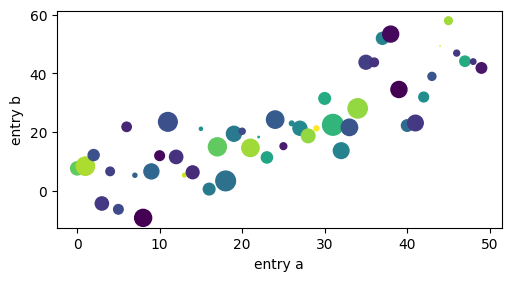

In [12]:
np.random.seed(1)  # set the random number generator
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# เพิ่มการระบุสีด้วย c และการระบุขนาดจุดด้วย s
ax.scatter('a', 'b', c='c', s='d', data=data)

ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

# Codeing Style

## The explicit & the implicit interfaces

- The Explicit Style = สร้าง Figures และ Axes และเรียก method ต่าง ๆ

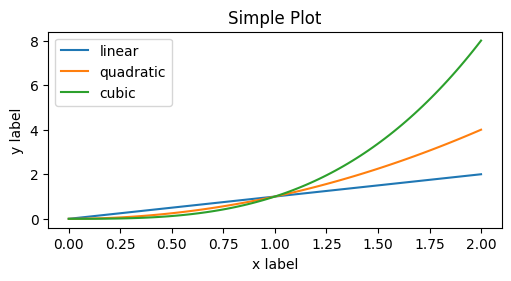

In [16]:
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot")

ax.legend() # แสดงผลพวก label ทั้งหมด ที่เราแปะป้ายไว้กับแต่ละ x,y ที่ plot

- The Implicit Style คือ ไม่สร้าง Figure กับ Axes แล้วใช้ pyplot(plt) เลย

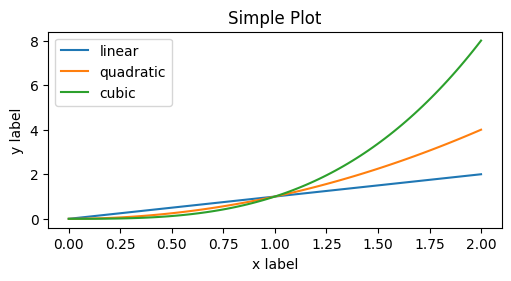

In [17]:
x = np.linspace(0, 2, 100)

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')

plt.legend()

## สร้าง helper function

- ถ้าเราต้องสร้างพล็อตเดิม ๆ ซ้ำ ๆ บนชุดข้อมูลที่ต่างกัน เราอาจจะสร้างเป็นฟังก์ชันแบบนี้:

In [18]:
def my_plotter(ax, data1, data2, param_dict):
    """
    ฟังก์ชันช่วยในการสร้างกราฟ
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

- เราสามารถใช้ฟังก์ชันช่วยนี้ในการสร้าง subplots สองอันได้

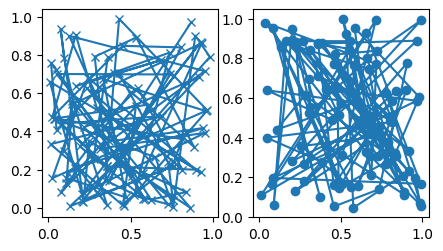

In [21]:
# สร้างชุดข้อมูลแบบสุ่มขึ้นมา 4 ชุด
data1, data2, data3, data4 = np.random.rand(4, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))

my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## เข้าถึง Axes ผ่าน index ที่ระบุตำแหน่ง Axes